In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.utils.np_utils import normalize

In [2]:
# Check if GPU is available
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

#import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10330121302522313982,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6932588160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7405646449339354623
 physical_device_desc: "device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:2d:00.0, compute capability: 7.5"]

In [3]:
# Normalize inputs
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [4]:
# Categorial labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# Data augmentation
train_datagen = ImageDataGenerator(rotation_range=45,
    width_shift_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
train_datagen.fit(X_train)

# training data generation
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32)

In [6]:
# Building the neural network model
activation = 'sigmoid'
model = Sequential()
model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = activation, kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

In [7]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = 1000,
        epochs = 10,
        validation_data = (X_test, y_test)
)

Epoch 1/10
C:\Users\jiango\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
1000/1000 [==============================] - 17s 13ms/step - loss: 1.9080 - accuracy: 0.3262 - val_loss: 1.5997 - val_accuracy: 0.4297
Epoch 2/10
1000/1000 [==============================] - 12s 12ms/step - loss: 1.5225 - accuracy: 0.4554 - val_loss: 2.1829 - val_accuracy: 0.3595
Epoch 3/10
1000/1000 [==============================] - 12s 12ms/step - loss: 1.3896 - accuracy: 0.5078 - val_loss: 2.1049 - val_accuracy: 0.3407
Epoch 4/10
1000/1000 [==============================] - 12s 12ms/step - loss: 1.3300 - accuracy: 0.5262 - val_loss: 1.5774 - val_accuracy: 0.4585
Epoch 5/10
1000/1000 [==============================] - 12s 12ms/step - loss: 1.2761 - accurac

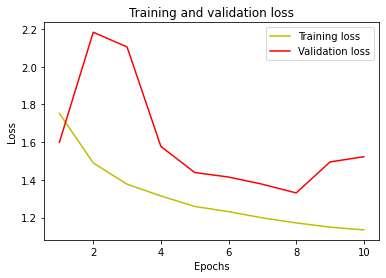

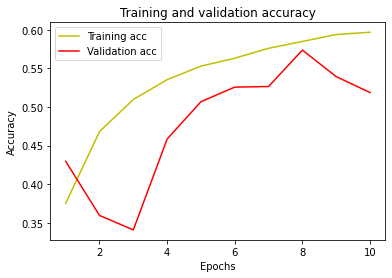

In [8]:
#plot the training/validation accuracy and loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()